In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('../data/diamonds.csv')

## Исследование исходных данных 
### Вывод базовой информации

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<font size=3>
Датасет содержит следующие поля:

- `carat` — вес алмаза в каратах
- `cut` — качество огранки алмаза (описано в порядке возрастания: удовлетворительное, хорошее, очень хорошее, премиум, идеальное)
- `color` — цвет бриллианта, где D — лучший, а J — худший
- `clarity` — показатель чистоты алмаза
- `depth` — глубина (%): высота алмаза, измеренная от калетта до площадки, деленная на средний диаметр его рундиста
- `table` — ширина площадки алмаза, выраженная в процентах от его среднего диаметра
- `price` — цена бриллианта
- `x` — длина  в мм
- `y` — ширина в мм
- `z` — высота в мм
</font>

In [5]:
data.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Удалим первый столбец, так как он содержит номер строки датасета и не является полезным для дальнешей работы.

In [6]:
data = data.drop(data.columns[0], axis=1)

data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Признаки `table`, `price` можно перевести из float64, а признаки `color`, `clarity`, необходимо закодировать числовыми значениями.

### Обработка пропущенных значений

In [8]:
(data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

Пропущенные значения отсутсвуют.

### Коррекция типов
#### Числовых признаков

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Проверим, что столбцы `table` и `price` можно перевести в int:

In [10]:
def can_convert_to_int(series):
    return (series % 1 == 0).all()

cols = [data['table'], data['price']]

print(sum([can_convert_to_int(x) for x in cols]))

1


In [11]:
np.seterr(over='ignore')

data['table'] = data['table'].astype('int8')
data['price'] = data['price'].astype('int16')

data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.448665,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.239779,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Категориальных признаков

In [12]:
data['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [13]:
dict_cut = {
    'Ideal': 5,
    'Premium' : 4,
    'Very Good' : 3,
    'Good' : 2,
    'Fair' : 1
}

data['cut'] = data['cut'].map(dict_cut)        

In [14]:
data['cut'].value_counts()

cut
5    21551
4    13791
3    12082
2     4906
1     1610
Name: count, dtype: int64

In [15]:
data['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [16]:
dict_color = {
    'D' : 7,
    'E' : 6,
    'F' : 5, 
    'G' : 4, 
    'H' : 3,
    'I' : 2,
    'J' : 1
}

data['color'] = data['color'].map(dict_color)

In [17]:
data['color'].value_counts()

color
4    11292
6     9797
5     9542
3     8304
7     6775
2     5422
1     2808
Name: count, dtype: int64

In [18]:
data['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [19]:
dict_color = {
    'IF' : 8,
    'VVS1' : 7,
    'VVS2' : 6,
    'VS1' : 5, 
    'VS2' : 4, 
    'SI1' : 3,
    'SI2' : 2,
    'I1' : 1
}

data['clarity'] = data['clarity'].map(dict_color)

In [20]:
data['clarity'].value_counts()

clarity
3    13065
4    12258
2     9194
5     8171
6     5066
7     3655
8     1790
1      741
Name: count, dtype: int64

**Изменения**
- `table`, `price` переведены из float64 в int8 и int16 соответственно, так как они являются целыми;
- `color`, `clarity`, закодированы числовыми значениями.

### Проверка "очищенных" данных

In [21]:
print(data.duplicated().sum())

146


In [22]:
data = data.drop_duplicates()

print(data.duplicated().sum())

0


Дубликаты обнаружены и удалены.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  int64  
 2   color    53794 non-null  int64  
 3   clarity  53794 non-null  int64  
 4   depth    53794 non-null  float64
 5   table    53794 non-null  int8   
 6   price    53794 non-null  int16  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(5), int16(1), int64(3), int8(1)
memory usage: 3.8 MB


In [24]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58,335,4.34,4.35,2.75


Признаки `cut`, `color`, `clarity` есть смысл перевести из int64 в int8 для экономии памяти.

In [25]:
attributes = ['cut', 'color', 'clarity']
for at in attributes:
    data[at] = data[at].astype('int8')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  int8   
 2   color    53794 non-null  int8   
 3   clarity  53794 non-null  int8   
 4   depth    53794 non-null  float64
 5   table    53794 non-null  int8   
 6   price    53794 non-null  int16  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(5), int16(1), int8(4)
memory usage: 2.8 MB


Типы и значения данных обработаны, можно переходить к следующим этапам обаботки.

## EDA

### Числовые признаки

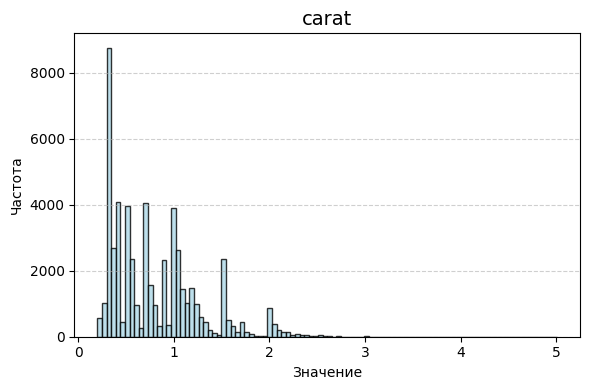

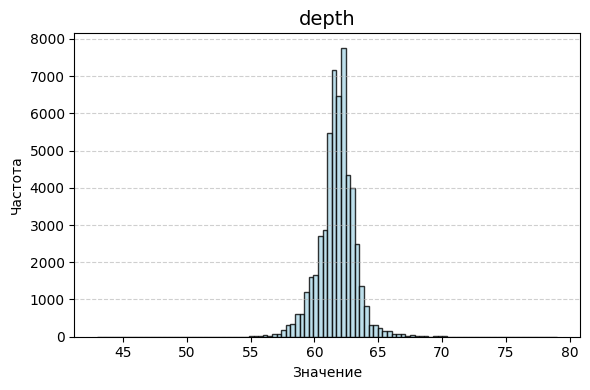

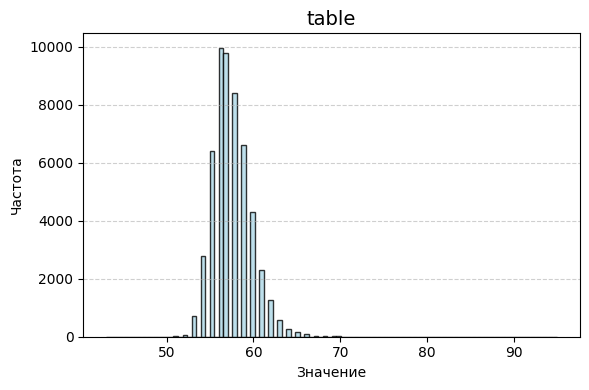

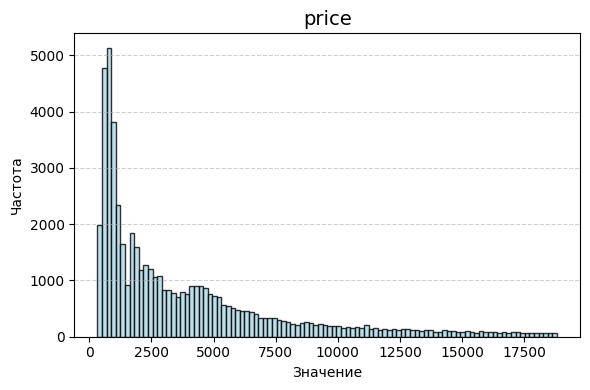

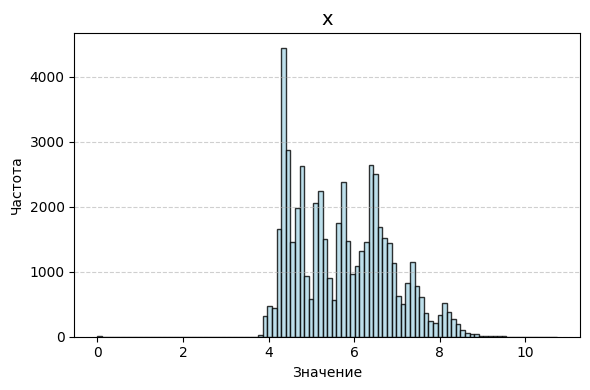

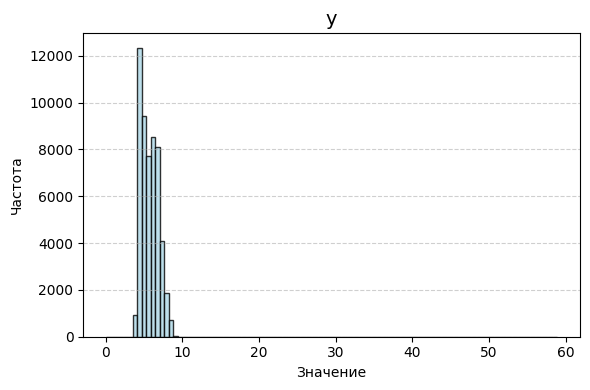

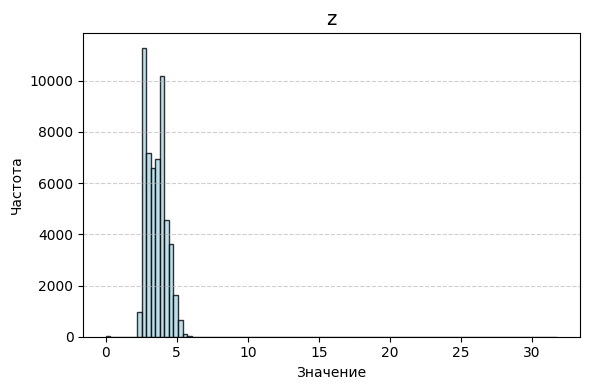

In [34]:
columns_num = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for col in columns_num:
    plt.figure(figsize=(6, 4))

    plt.hist(
        data[col],
        bins=100,
        color='lightblue',
        edgecolor='black',
        alpha=0.8 
    )

    plt.title(f'{col}', fontsize=14)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

### Обработка выбросов в числовых признаках

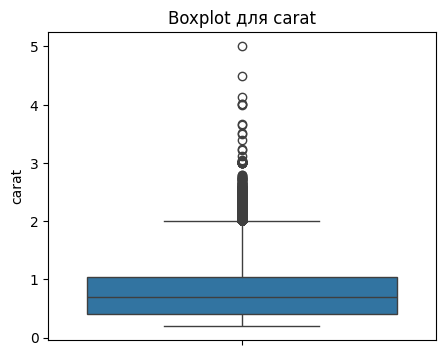

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data['carat'])
plt.title('Boxplot для carat')
plt.show()

По графику boxplot для `carat` видно, что значения carat >= 2 являются выбросами. 

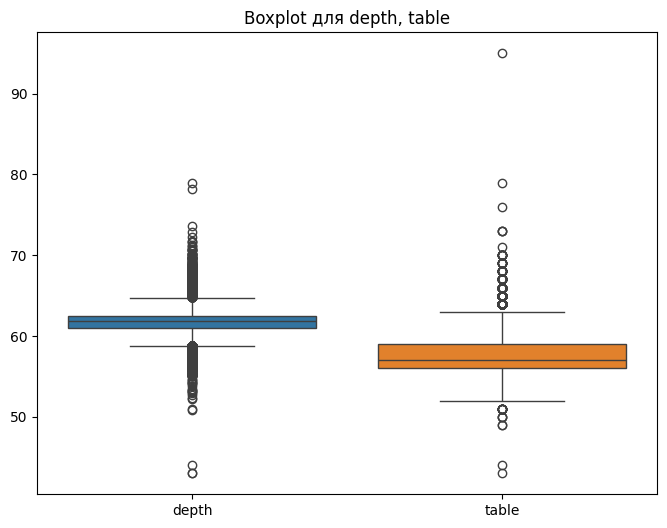

In [53]:
col_for_boxplot = ['depth', 'table']
plt.figure(figsize=(8, 6))
sns.boxplot(data[col_for_boxplot])
plt.title('Boxplot для depth, table')
plt.show()

Распределения `depth` и `table` имеют схожесть с нормальным, поэтому имеет смысл убрать выбросы при помощи квантилей.

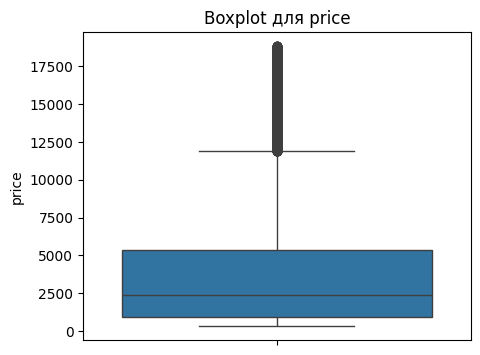

In [59]:
plt.figure(figsize=(5, 4))
sns.boxplot(data['price'])
plt.title('Boxplot для price')
plt.show()

Гистограмма `price` сильно скошена вправо, имеет длинный хвост и не похожа на нормальное распределение, в связи с этим обрежем уберем записи с `price` >= 12500.

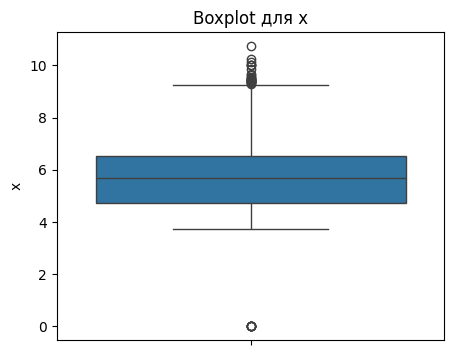

In [56]:
plt.figure(figsize=(5, 4))
sns.boxplot(data['x'])
plt.title('Boxplot для x')
plt.show()

Оставим центральные 90% значений признака `x` (от 5-го до 95-го перцентиля), так его распределение не похоже на нормальное.

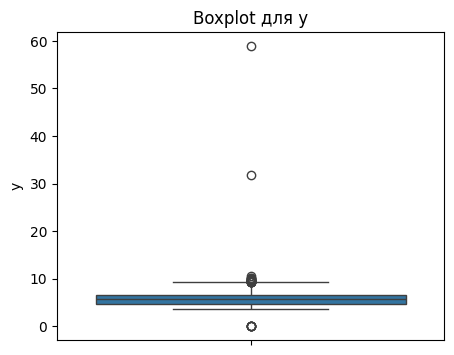

In [57]:
plt.figure(figsize=(5, 4))
sns.boxplot(data['y'])
plt.title('Boxplot для y')
plt.show()

Оставим центральные 90% значений признака `y` (от 5-го до 95-го перцентиля), так его распределение не похоже на нормальное.

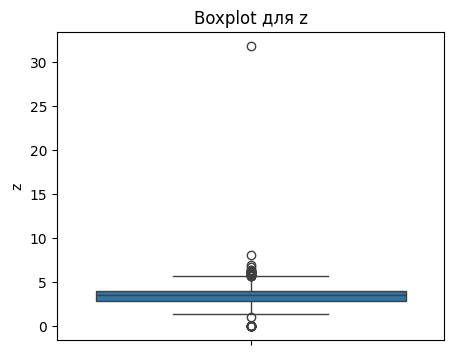

In [58]:
plt.figure(figsize=(5, 4))
sns.boxplot(data['z'])
plt.title('Boxplot для z')
plt.show()

Оставим центральные 90% значений признака `z` (от 5-го до 95-го перцентиля), так его распределение не похоже на нормальное.